In [1]:
import pandas as pd

# Load metadata.csv
df = pd.read_csv("metadata.csv")

# Quick look
print(df.shape)     # dimensions
print(df.info())    # data types
print(df.head(3))   # first rows


C:\Users\Admin\AppData\Local\Temp\ipykernel_21524\3562840544.py:4: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


(1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null  

In [2]:
# Check missing values
print(df.isnull().sum().head(20))

# Basic statistics
print(df.describe())


cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64
       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


In [3]:
# Convert dates
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year

# Example: create abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))


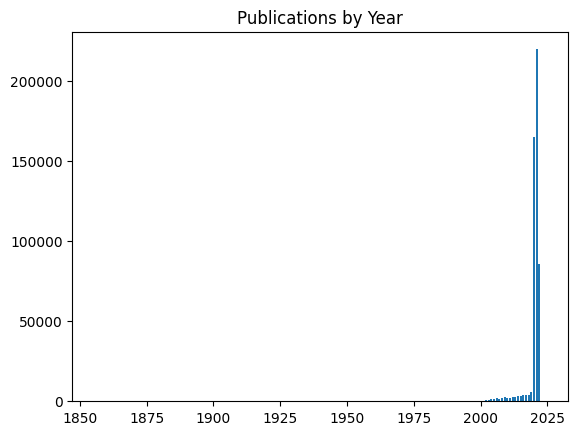

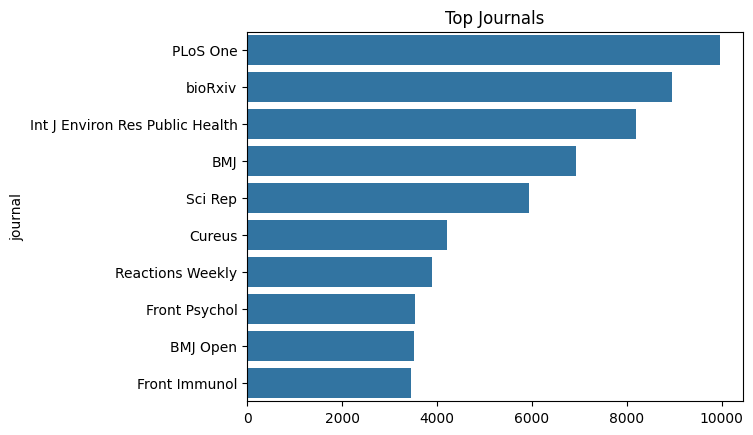

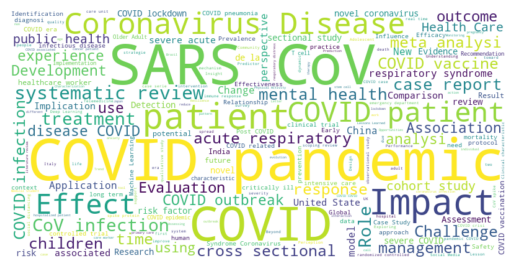

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Publications per year
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(10)
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top Journals")
plt.show()

# Word cloud from titles
text = " ".join(df['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
